# Descriptivo general. Cuestionario Complementario

In [1]:
import os
os.chdir('../../')
#os.chdir('./aprender_cife')

In [2]:
%matplotlib inline  
from funciones.exploratorio import (barras_apiladas, tabla_pond, from_to, df, cod, col_div, col_cat, barras_apiladas_setiq, etiquetas, val_lab,
                                    crear_paleta, parse_ylab, anotar_porcentajes, anotar_porcentaje_barras, barras_minimalista,
                                    col_cat_val, col_lab)  

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import textwrap

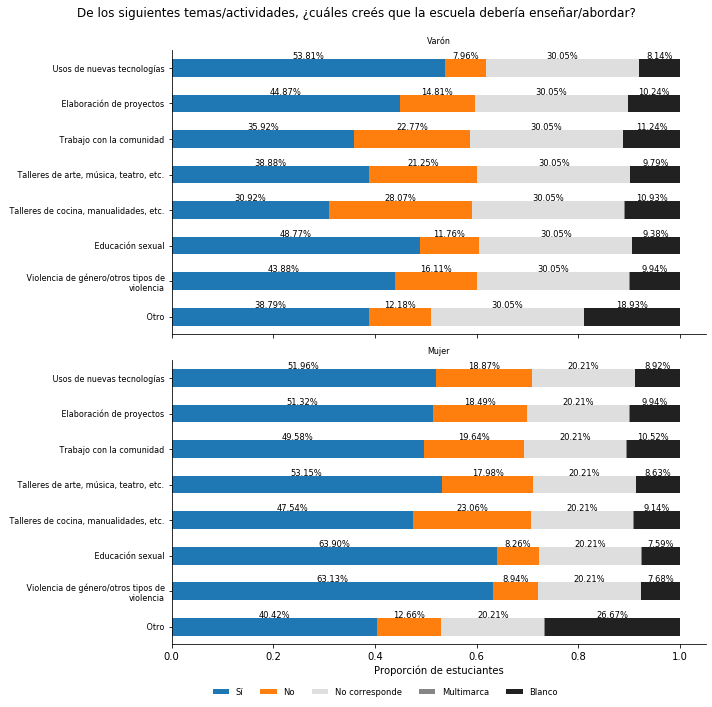

In [4]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('ap2')[l])[0:2]
## Creamos la paleta de colores
t=tabla_pond(l)
color = col_cat(t).values

fig, axs = plt.subplots(len(dfl), 1, sharex=True, sharey=True, figsize=(10,10))
m = val_lab('ap2')['Etiqueta.1'].to_dict()
for i in range(len(dfl)):
    t=tabla_pond(l, df=dfl[i][1])
    barras_apiladas_setiq(t, axs[i], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 40)
    axs[i].set_yticklabels(colnames.label, fontdict = {'fontsize':8})
    axs[i].set_title(m[dfl[i][0]].strip(), fontdict = {'fontsize':8})
    # Hide the right and top spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    anotar_porcentajes(axs[i])

axs.flatten()[-1].set_xlabel('Proporción de estuciantes')


fig.subplots_adjust(top=0.98, left=0.10, right=.98, bottom=0.05)


axs.flatten()[-1].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.4, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']), fontsize='small', frameon=False)  
fig.tight_layout()
fig.suptitle(colnames.title[0])

fig.tight_layout()
fig.subplots_adjust(top=0.92)

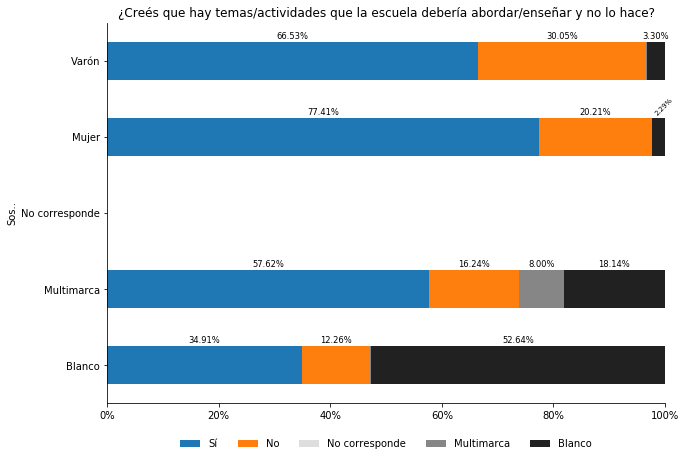

In [19]:
## Cramos una tablas con las frecuencias con ponderaciones
t = df.groupby(['ap2', 'ap36'])['ponder'].sum().reset_index().pivot(index='ap36', columns='ap2')
## Tiramos el multiIndex
t.columns = t.columns.droplevel(0)
## Reordenamos para graficar
t=t.reindex(columns=t.columns.sort_values(ascending=False))

## Mapeamos los nombres de ylabel y legend
ylabel = val_lab('ap2')['Etiqueta.1'].to_dict()
legend = val_lab('ap36')['Etiqueta.1'].to_dict()

v=t.index.values
colores = col_cat_val(t.index.values)

#t.T.plot(kind='barh', stacked=True, colors=colores.values)
## Calculamos las frecuencias relativas ponderadas y seleccionamos los valores a graficar
tot=t.sum()
t = t.divide(tot, axis=1)

## Graficamos
fig, ax = plt.subplots(figsize=(10,7))
t.T.plot(kind='barh',
         stacked=True,
         color=colores.values,
         ax=ax)


ylabel = pd.Series(t.columns.map(ylabel))
ax.set(yticklabels = ylabel.apply(lambda x: textwrap.fill(x, width=25)),
       ylabel=col_lab(t.columns.name),
       xlim=(0,1))

ax.set_title(col_lab(t.index.name))

ax.legend(t.index.map(legend), loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False,
              shadow=False, ncol=ylabel.size)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

## Visualizamos las proporciones como porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

anotar_porcentajes(ax)

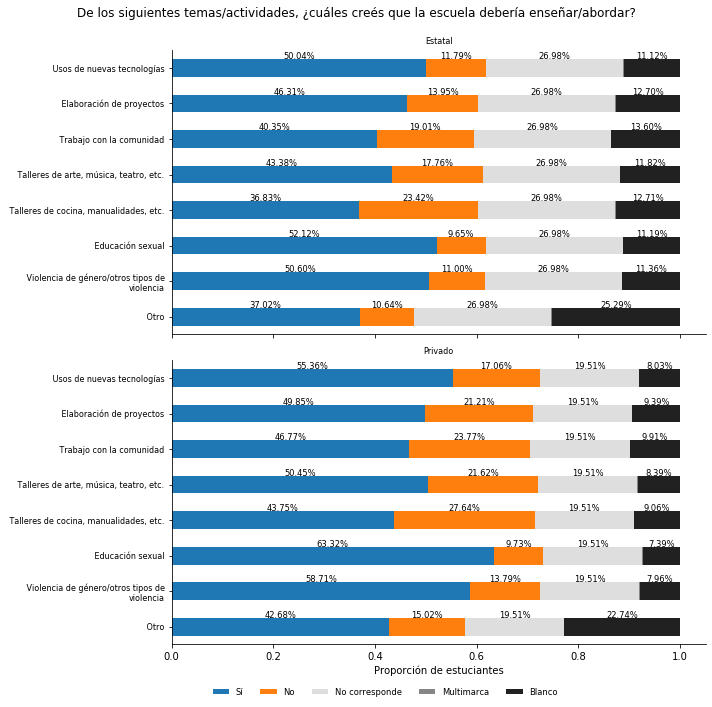

In [5]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('sector')[l])[0:2]
## Creamos la paleta de colores
t=tabla_pond(l)
color = col_cat(t).values

fig, axs = plt.subplots(len(dfl), 1, sharex=True, sharey=True, figsize=(10,10))
m = val_lab('sector')['Etiqueta.1'].to_dict()
for i in range(len(dfl)):
    t=tabla_pond(l, df=dfl[i][1])
    barras_apiladas_setiq(t, axs[i], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 40)
    axs[i].set_yticklabels(colnames.label, fontdict = {'fontsize':8})
    axs[i].set_title(m[dfl[i][0]].strip(), fontdict = {'fontsize':8})
    # Hide the right and top spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    anotar_porcentajes(axs[i])

axs.flatten()[-1].set_xlabel('Proporción de estuciantes')


fig.subplots_adjust(top=0.98, left=0.10, right=.98, bottom=0.05)


axs.flatten()[-1].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.4, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']), fontsize='small', frameon=False)  
fig.tight_layout()
fig.suptitle(colnames.title[0])

fig.tight_layout()
fig.subplots_adjust(top=0.92)

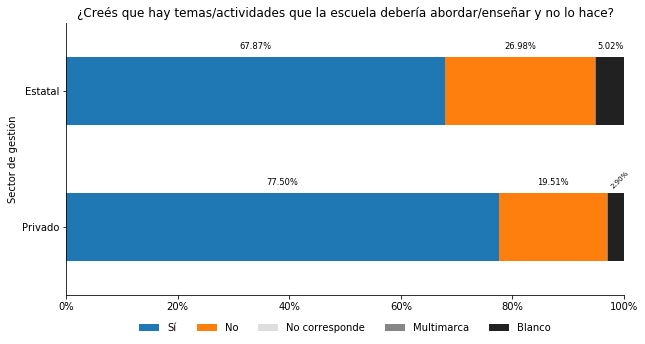

In [23]:
## Cramos una tablas con las frecuencias con ponderaciones
t = df.groupby(['sector', 'ap36'])['ponder'].sum().reset_index().pivot(index='ap36', columns='sector')
## Tiramos el multiIndex
t.columns = t.columns.droplevel(0)
## Reordenamos para graficar
t=t.reindex(columns=t.columns.sort_values(ascending=False))

## Mapeamos los nombres de ylabel y legend
ylabel = val_lab('sector')['Etiqueta.1'].to_dict()
legend = val_lab('ap36')['Etiqueta.1'].to_dict()

v=t.index.values
colores = col_cat_val(t.index.values)

#t.T.plot(kind='barh', stacked=True, colors=colores.values)
## Calculamos las frecuencias relativas ponderadas y seleccionamos los valores a graficar
tot=t.sum()
t = t.divide(tot, axis=1)

## Graficamos
fig, ax = plt.subplots(figsize=(10,5))
t.T.plot(kind='barh',
         stacked=True,
         color=colores.values,
         ax=ax)


ylabel = pd.Series(t.columns.map(ylabel))
ax.set(yticklabels = ylabel.apply(lambda x: textwrap.fill(x, width=25)),
       ylabel=col_lab(t.columns.name),
       xlim=(0,1))

ax.set_title(col_lab(t.index.name))

ax.legend(t.index.map(legend), loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False,
              shadow=False, ncol=len(legend))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

## Visualizamos las proporciones como porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

anotar_porcentajes(ax)

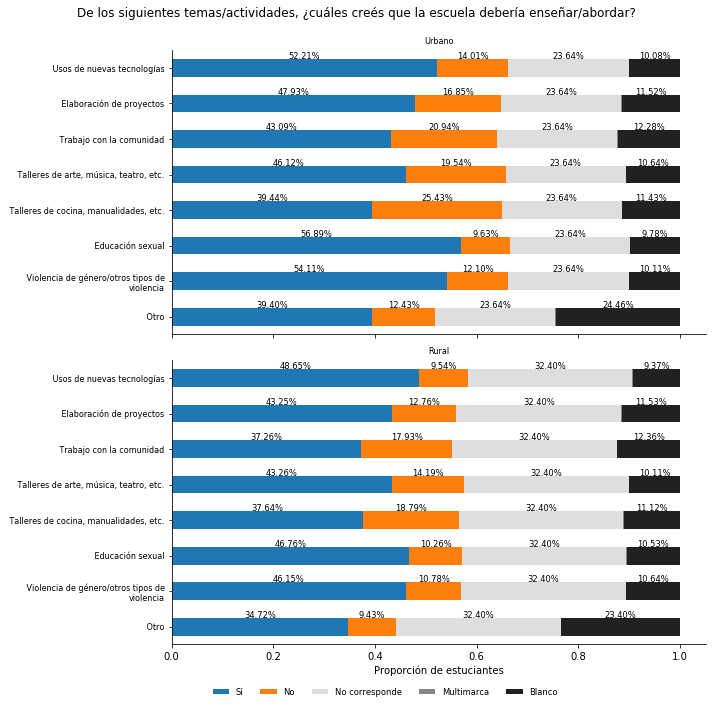

In [6]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('ambito')[l])[0:2]
## Creamos la paleta de colores
t=tabla_pond(l)
color = col_cat(t).values

fig, axs = plt.subplots(len(dfl), 1, sharex=True, sharey=True, figsize=(10,10))
m = val_lab('ambito')['Etiqueta.1'].to_dict()
for i in range(len(dfl)):
    t=tabla_pond(l, df=dfl[i][1])
    barras_apiladas_setiq(t, axs[i], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 40)
    axs[i].set_yticklabels(colnames.label, fontdict = {'fontsize':8})
    axs[i].set_title(m[dfl[i][0]].strip(), fontdict = {'fontsize':8})
    # Hide the right and top spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    anotar_porcentajes(axs[i])

axs.flatten()[-1].set_xlabel('Proporción de estuciantes')


fig.subplots_adjust(top=0.98, left=0.10, right=.98, bottom=0.05)


axs.flatten()[-1].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.4, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']), fontsize='small', frameon=False)  
fig.tight_layout()
fig.suptitle(colnames.title[0])

fig.tight_layout()
fig.subplots_adjust(top=0.92)

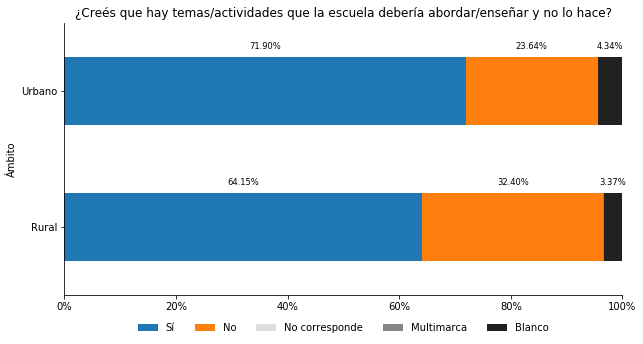

In [24]:
## Cramos una tablas con las frecuencias con ponderaciones
t = df.groupby(['ambito', 'ap36'])['ponder'].sum().reset_index().pivot(index='ap36', columns='ambito')
## Tiramos el multiIndex
t.columns = t.columns.droplevel(0)
## Reordenamos para graficar
t=t.reindex(columns=t.columns.sort_values(ascending=False))

## Mapeamos los nombres de ylabel y legend
ylabel = val_lab('ambito')['Etiqueta.1'].to_dict()
legend = val_lab('ap36')['Etiqueta.1'].to_dict()

v=t.index.values
colores = col_cat_val(t.index.values)

#t.T.plot(kind='barh', stacked=True, colors=colores.values)
## Calculamos las frecuencias relativas ponderadas y seleccionamos los valores a graficar
tot=t.sum()
t = t.divide(tot, axis=1)

## Graficamos
fig, ax = plt.subplots(figsize=(10,5))
t.T.plot(kind='barh',
         stacked=True,
         color=colores.values,
         ax=ax)


ylabel = pd.Series(t.columns.map(ylabel))
ax.set(yticklabels = ylabel.apply(lambda x: textwrap.fill(x, width=25)),
       ylabel=col_lab(t.columns.name),
       xlim=(0,1))

ax.set_title(col_lab(t.index.name))

ax.legend(t.index.map(legend), loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False,
              shadow=False, ncol=len(legend))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

## Visualizamos las proporciones como porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

anotar_porcentajes(ax)

(0.0, 1.0500000000000003, -0.5, 7.5)

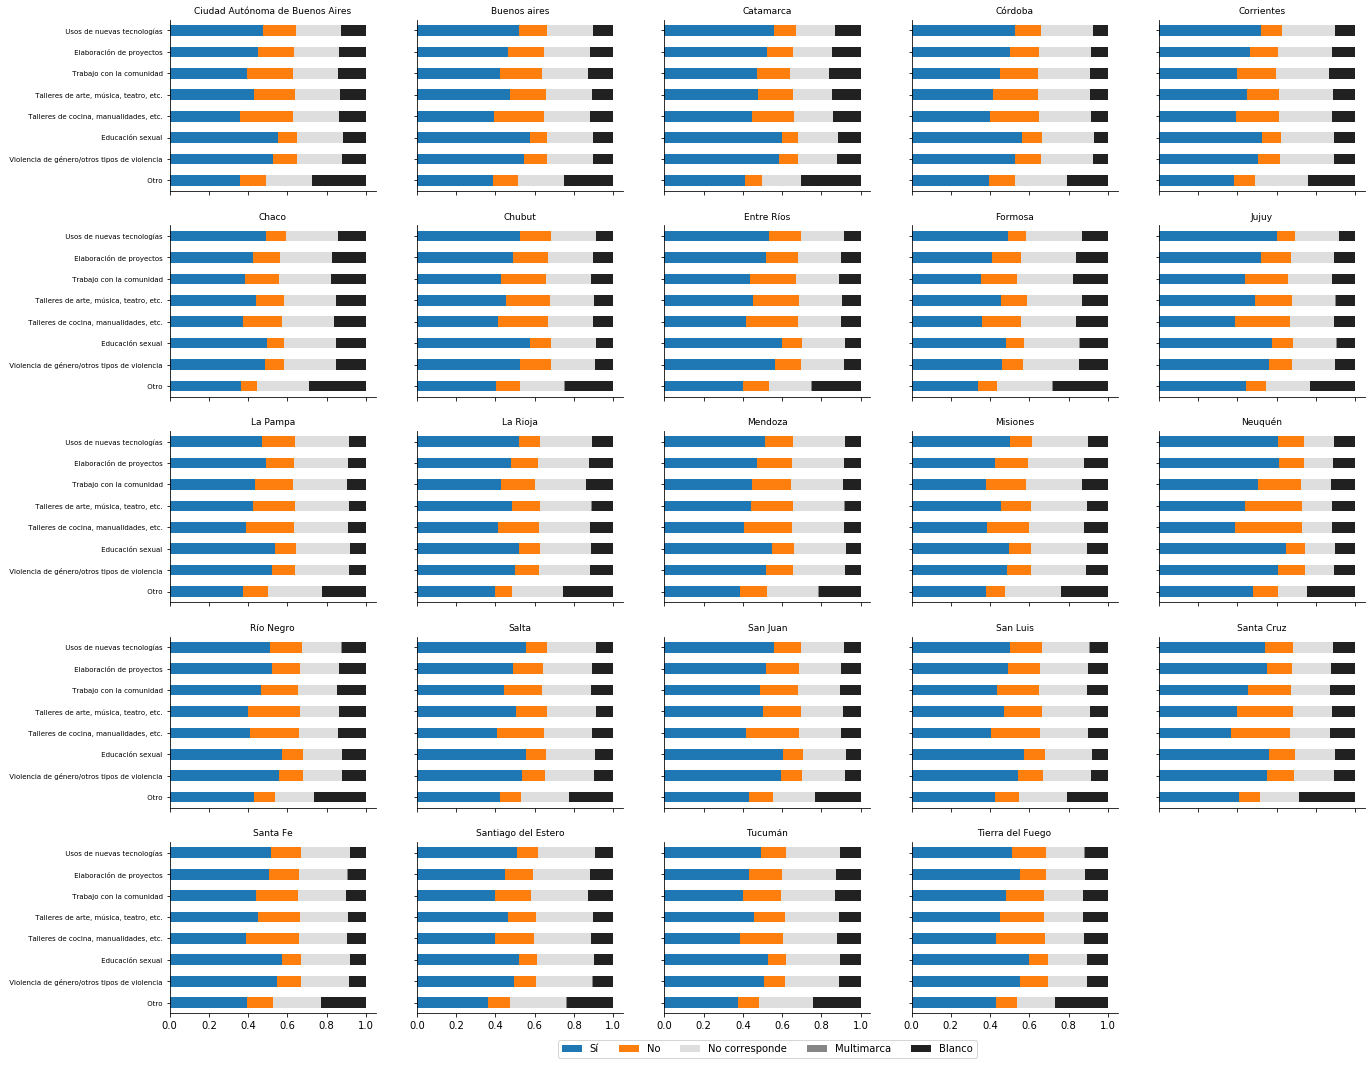

In [7]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('cod_provincia')[l])
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(20,15))

color = col_cat(t).values
m = val_lab('cod_provincia')['Etiqueta.1'].to_dict()

for k in range(len(dfl)):
    j=k%5
    i=k//5
    t=tabla_pond(l, df=dfl[k][1])
    barras_apiladas_setiq(t, axs[i,j], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 55)
    axs[i,j].set_yticklabels(colnames.label, fontdict = {'fontsize':7})
    axs[i,j].set_title(m[dfl[k][0]].strip(), fontdict = {'fontsize':9})
    # Hide the right and top spines
    axs[i,j].spines['right'].set_visible(False)
    axs[i,j].spines['top'].set_visible(False)
    
fig.subplots_adjust(top=0.97, left=0.15, right=.98, bottom=0.05)
axs.flatten()[-3].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.5, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']))   

axs[4,4].axis('off')

## Según nivel educativo de la madre

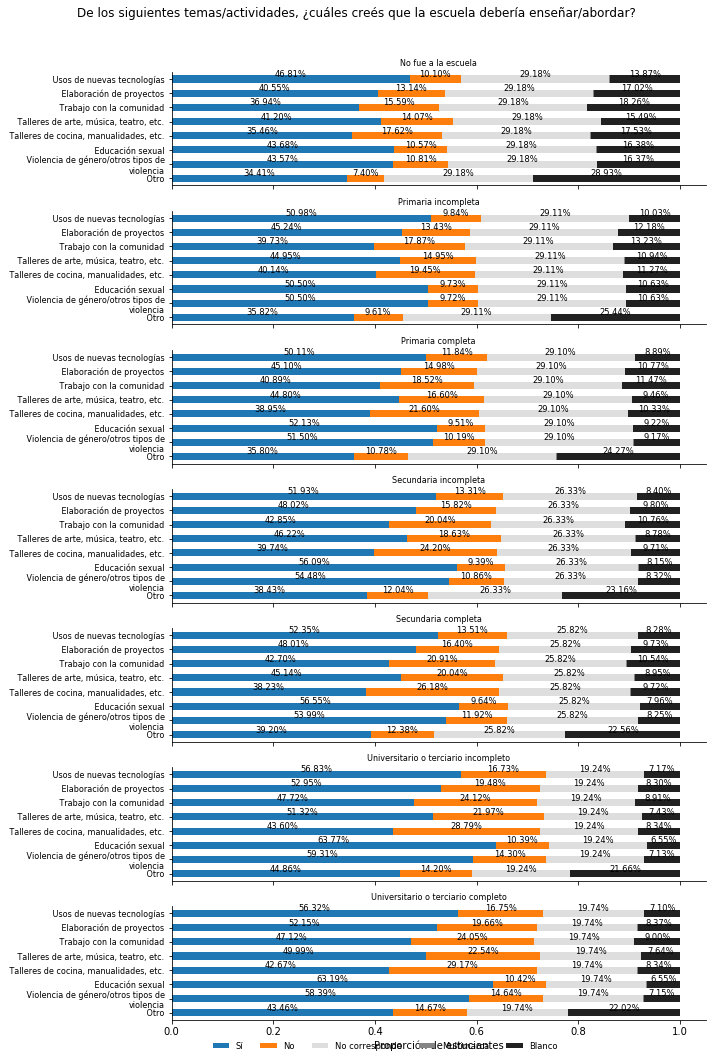

In [8]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('ap10')[l])[0:7]
## Creamos la paleta de colores
t=tabla_pond(l)
color = col_cat(t).values

fig, axs = plt.subplots(len(dfl), 1, sharex=True, sharey=True, figsize=(10,15))
m = val_lab('ap10')['Etiqueta.1'].to_dict()
for i in range(len(dfl)):
    t=tabla_pond(l, df=dfl[i][1])
    barras_apiladas_setiq(t, axs[i], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 40)
    axs[i].set_yticklabels(colnames.label, fontdict = {'fontsize':8})
    axs[i].set_title(m[dfl[i][0]].strip(), fontdict = {'fontsize':8})
    # Hide the right and top spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    anotar_porcentajes(axs[i])

axs.flatten()[-1].set_xlabel('Proporción de estuciantes')


fig.subplots_adjust(top=0.98, left=0.10, right=.98, bottom=0.05)


axs.flatten()[-1].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.4, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']), fontsize='small', frameon=False)  
fig.tight_layout()
fig.suptitle(colnames.title[0])

fig.tight_layout()
fig.subplots_adjust(top=0.92)

## Según nivel educativo del padre

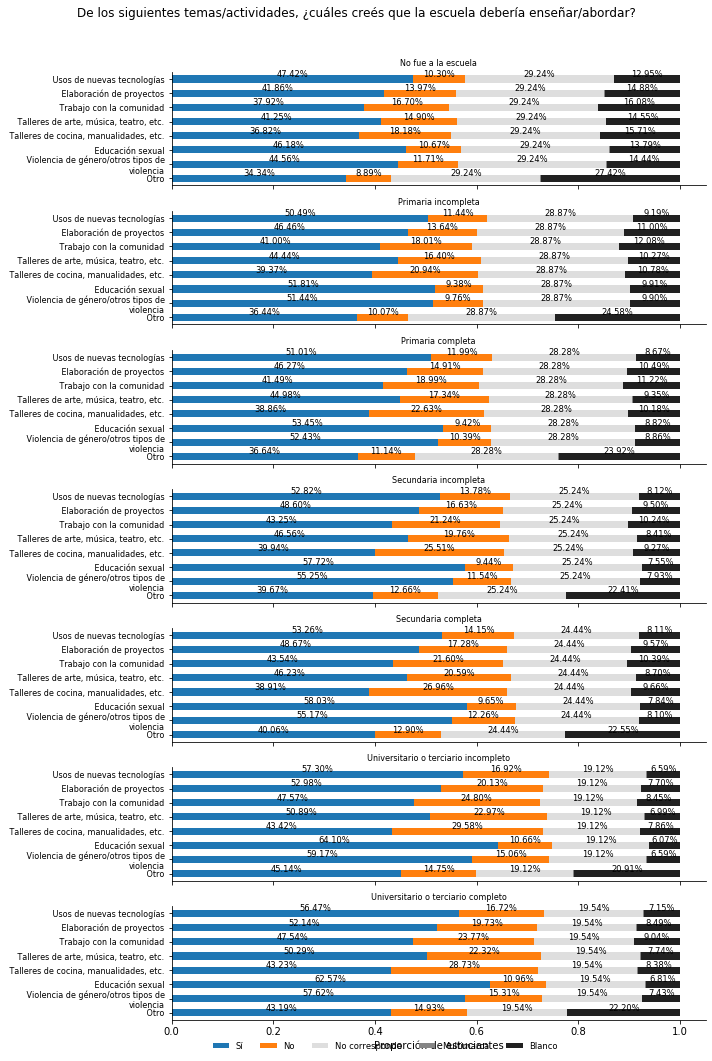

In [9]:
l = from_to('ap37a', 'ap37h')
l = l[::-1]
dfl = list(df.groupby('ap11')[l])[0:7]
## Creamos la paleta de colores
t=tabla_pond(l)
color = col_cat(t).values

fig, axs = plt.subplots(len(dfl), 1, sharex=True, sharey=True, figsize=(10,15))
m = val_lab('ap11')['Etiqueta.1'].to_dict()
for i in range(len(dfl)):
    t=tabla_pond(l, df=dfl[i][1])
    barras_apiladas_setiq(t, axs[i], color)
    colnames, valnames = etiquetas(t)
    colnames = parse_ylab(colnames, True, 40)
    axs[i].set_yticklabels(colnames.label, fontdict = {'fontsize':8})
    axs[i].set_title(m[dfl[i][0]].strip(), fontdict = {'fontsize':8})
    # Hide the right and top spines
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    anotar_porcentajes(axs[i])

axs.flatten()[-1].set_xlabel('Proporción de estuciantes')


fig.subplots_adjust(top=0.98, left=0.10, right=.98, bottom=0.05)


axs.flatten()[-1].legend(valnames['Etiqueta.1'], loc='upper center', bbox_to_anchor=(0.4, -0.125),
              shadow=False, ncol=len(valnames['Etiqueta.1']), fontsize='small', frameon=False)  
fig.tight_layout()
fig.suptitle(colnames.title[0])

fig.tight_layout()
fig.subplots_adjust(top=0.92)

## ¿Crees que la escuela debería abordar/enseñar temas y no lo hace?

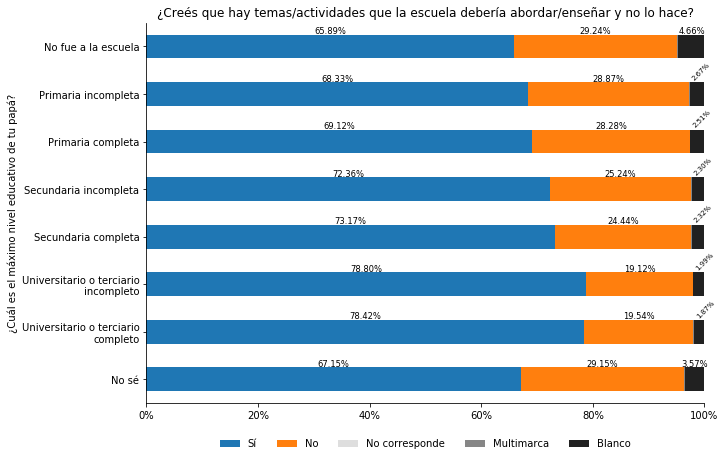

In [12]:
## Cramos una tablas con las frecuencias con ponderaciones
t = df.groupby(['ap11', 'ap36'])['ponder'].sum().reset_index().pivot(index='ap36', columns='ap11')
## Tiramos el multiIndex
t.columns = t.columns.droplevel(0)
## Reordenamos para graficar
t=t.reindex(columns=t.columns.sort_values(ascending=False))

## Mapeamos los nombres de ylabel y legend
ylabel = val_lab('ap11')['Etiqueta.1'].to_dict()
legend = val_lab('ap36')['Etiqueta.1'].to_dict()

v=t.index.values
colores = col_cat_val(t.index.values)

#t.T.plot(kind='barh', stacked=True, colors=colores.values)
## Calculamos las frecuencias relativas ponderadas y seleccionamos los valores a graficar
tot=t.sum()
t = t.divide(tot, axis=1).loc[:,'8':'1']

## Graficamos
fig, ax = plt.subplots(figsize=(10,7))
t.T.plot(kind='barh',
         stacked=True,
         color=colores.values,
         ax=ax)


ylabel = pd.Series(t.columns.map(ylabel))
ax.set(yticklabels = ylabel.apply(lambda x: textwrap.fill(x, width=25)),
       ylabel=col_lab(t.columns.name),
       xlim=(0,1))

ax.set_title(col_lab(t.index.name))

ax.legend(t.index.map(legend), loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False,
              shadow=False, ncol=ylabel.size)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

## Visualizamos las proporciones como porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

anotar_porcentajes(ax)

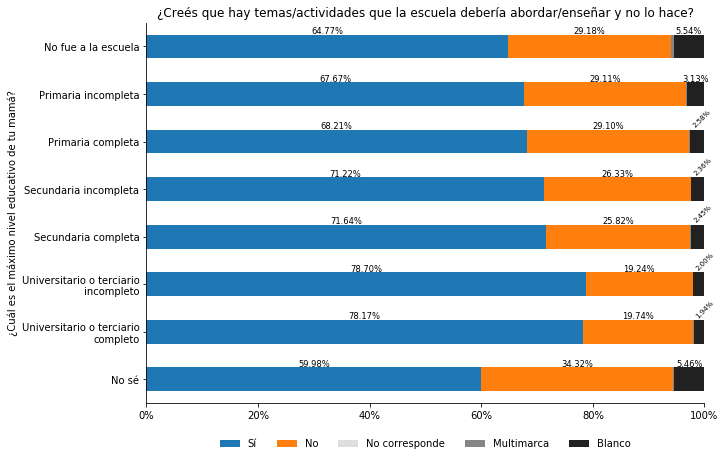

In [15]:
## Cramos una tablas con las frecuencias con ponderaciones
t = df.groupby(['ap10', 'ap36'])['ponder'].sum().reset_index().pivot(index='ap36', columns='ap10')
## Tiramos el multiIndex
t.columns = t.columns.droplevel(0)
## Reordenamos para graficar
t=t.reindex(columns=t.columns.sort_values(ascending=False))

## Mapeamos los nombres de ylabel y legend
ylabel = val_lab('ap10')['Etiqueta.1'].to_dict()
legend = val_lab('ap36')['Etiqueta.1'].to_dict()

v=t.index.values
colores = col_cat_val(t.index.values)

#t.T.plot(kind='barh', stacked=True, colors=colores.values)
## Calculamos las frecuencias relativas ponderadas y seleccionamos los valores a graficar
tot=t.sum()
t = t.divide(tot, axis=1).loc[:,'8':'1']

## Graficamos
fig, ax = plt.subplots(figsize=(10,7))
t.T.plot(kind='barh',
         stacked=True,
         color=colores.values,
         ax=ax)


ylabel = pd.Series(t.columns.map(ylabel))
ax.set(yticklabels = ylabel.apply(lambda x: textwrap.fill(x, width=25)),
       ylabel=col_lab(t.columns.name),
       xlim=(0,1))

ax.set_title(col_lab(t.index.name))

ax.legend(t.index.map(legend), loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False,
              shadow=False, ncol=ylabel.size)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

## Visualizamos las proporciones como porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

anotar_porcentajes(ax)